<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II - R4052

# Tarea Semanal 1
#### Victor Rodolfo Gerez | 146.766-9


Ejercicio 7 del TP1.

Para los siguientes circuitos conocidos como Filtro Pasa Todo o Rotador de fase, se pide:

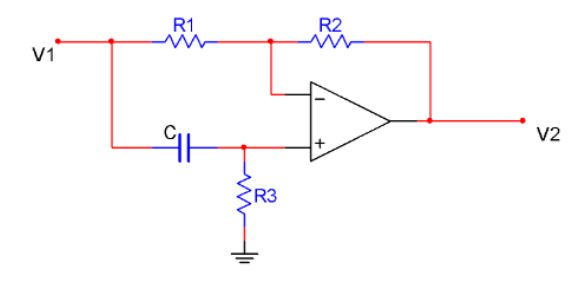

1) Obtener la función transferencia V2V1 ( módulo , fase y diagrama de polos y ceros).  
2) Obtenga la función transferencia, pero normalizada. ¿Cuál sería en este caso la norma de frecuencia y qué interpretación circuital podría tener?  
3) Simule la función transferencia normalizada (Python, Matlab, etc.).  
4) Simule el circuito y obtenga la respuesta en frecuencia pedida en 1), para los valores:  R2R1=1 ; R3=1kΩ y C=1µF  
5) ¿Qué utilidad podría tener este tipo de circuitos pasa-todo?

### **1)**
### $I_{C} = I_{R3}$  
### $\frac{V_1-V_A}{\frac 1{SC}} = \frac {V_A}{R_3}$  
### $SCV_1 = V_A(\frac 1{R_3}+SC)$      
### $\frac {SCR_3}{SCR_3+1}V_1 = V_A$      

---------------

### $I_{R1} = I_{R2}$  
### $\frac{V_1-V_A}{R_1} = \frac {V_A-V_2}{R_2}$  
### $\frac {V_1}{R_1}= V_A(\frac 1{R_1}+\frac 1{R_2})-\frac {V_2}{R_2}$      
### Como $ R_2=R_1=R \Rightarrow \frac {V_1}R = 2\frac {V_A}R-\frac {V_2}R$      
### $V_1 = 2 \frac {SCR_3}{SCR_3+1}V_1-V_2$  
### $V_2 = V_1 (\frac {2 SCR_3}{SCR_3+1}-1)$  
### $A_v= \frac {V_2}{V_1} = \frac {2 CR_3S-(SCR_3+1)}{SCR_3+1}=\frac {CR_3S-1}{CR_3S+1}$   
### $\boxed{A_v=\frac {S-\frac 1{R_3C}}{S+\frac 1{R_3C}}}$   

---------------

### Siendo $\,\omega_0=\frac 1{R_3C} \Rightarrow A_v=\frac {S-\omega_0}{S+\omega_0}$ 
### Reemplazando valores de componentes $\,\omega_0=1000 \frac {rad}{seg}$  

---------------
### ${A_v(S)}=\frac {S-\omega_0}{S+\omega_0}$  
### ${A_v(S)}_{S=j\omega}=\frac {j\omega-\omega_0}{j\omega+\omega_0}$  
### $\left|{A_v(j\omega)}\right|=\frac {\left|{N(j\omega)}\right|}{\left|{D(j\omega)}\right|}=\frac {\sqrt{\omega_0^2+\omega^2}}{\sqrt{\omega_0^2+\omega^2}}$  
### $\boxed{\left|{A_v(j\omega)}\right|=1=0\,dB}$
### $\phi [A_v(j\omega)]=\arctan(\frac {\Im[A_v(j\omega)]}{\Re[A_v(j\omega)]})=\arctan(\frac \omega{-\omega_0})-\arctan(\frac \omega{\omega_0})$  
### Como $\, \arctan(\frac \omega{-\omega_0})=-\arctan(\frac \omega{\omega_0})\,$ por ser función impar  
### $\boxed{\phi [A_v(j\omega)]=-2\arctan(\frac \omega{\omega_0})}$  
### Si $\, \omega\rightarrow 0 \Rightarrow \phi [A_v(j\omega)] \rightarrow \pi$  
### Si $\, \omega\rightarrow \omega_0 \Rightarrow \phi [A_v(j\omega)] \rightarrow \frac \pi 2$  
### Si $\, \omega\rightarrow \infty \Rightarrow \phi [A_v(j\omega)] \rightarrow 0$ 

---------------
### **2)**
### Normalizo $ \rightarrow \boxed{\Omega= \frac 1{R_3C}=1000 \frac 1{seg}} \Rightarrow  \omega_0=1 \Rightarrow \boxed{A_v=\frac {S-1}{S+1}}$   
### $\boxed{A_v=\frac {S-\frac 1{R_3C}}{S+\frac 1{R_3C}}}$   
### Calculo nuevo componente $\,C_N=C\,\Omega=1mF$ 
#### Nota: es posible calcular otros valores de $\,R_3 y\, C\,$ más convenientes utilizando también la norma de impedancia. Ejemplo:  
### $\mathbb Z=0,1\,\Omega \Rightarrow {R_3}_N=10\,k \land C_N=100 \mu$  



<img src="./Simu_TS2_circ.png" align="center"/> 
<img src="./Simu_TS2_bode.png" align="center"/> 

------------
### **3)**

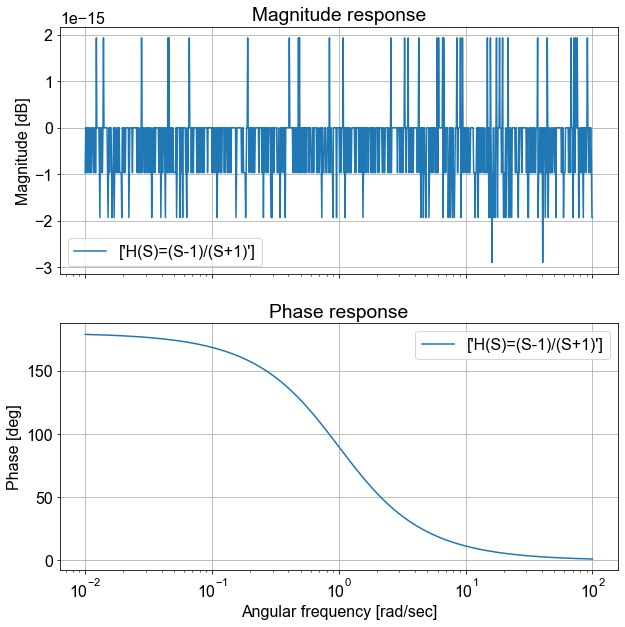

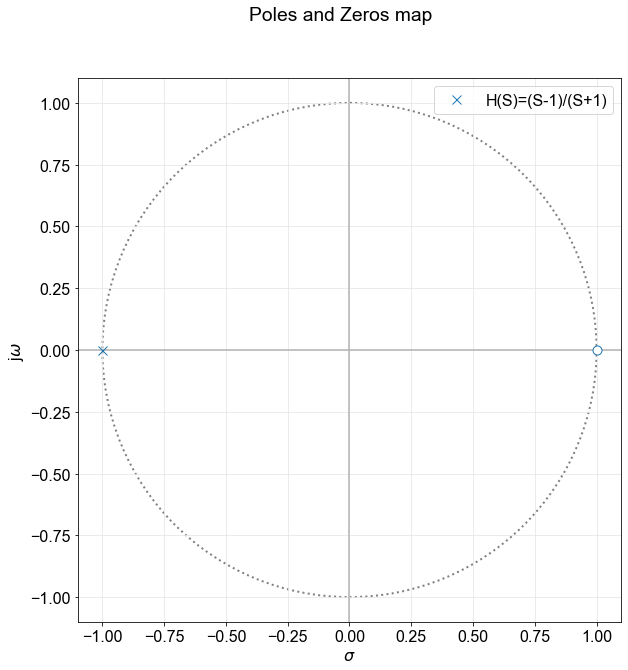

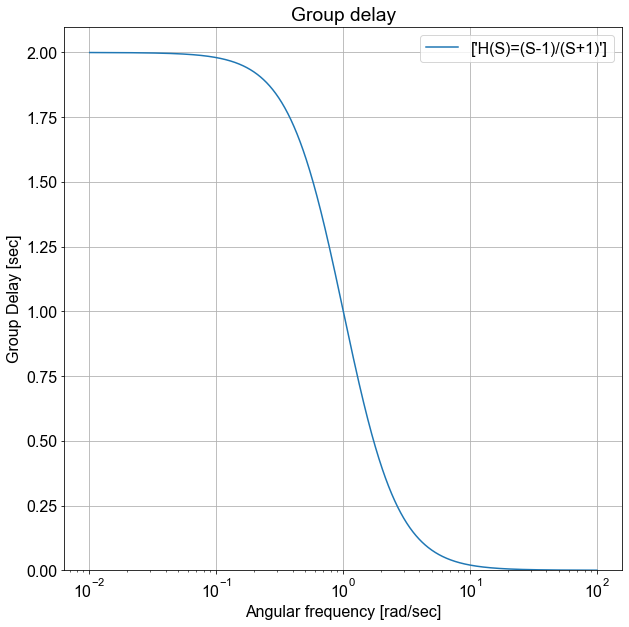

In [4]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

mpl.rcParams['figure.figsize'] = (10,10)

fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Arial'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

from scipy import signal as sig
from splane import analyze_sys, pretty_print_bicuad_omegayq
    
num = np.array([1,-1]) 
den = np.array([1,1])

#pretty_print_bicuad_omegayq(num,den)

ts1 = sig.TransferFunction(num,den)
plt.close('all')
analyze_sys(ts1,'H(S)=(S-1)/(S+1)')

------------
### **4)**

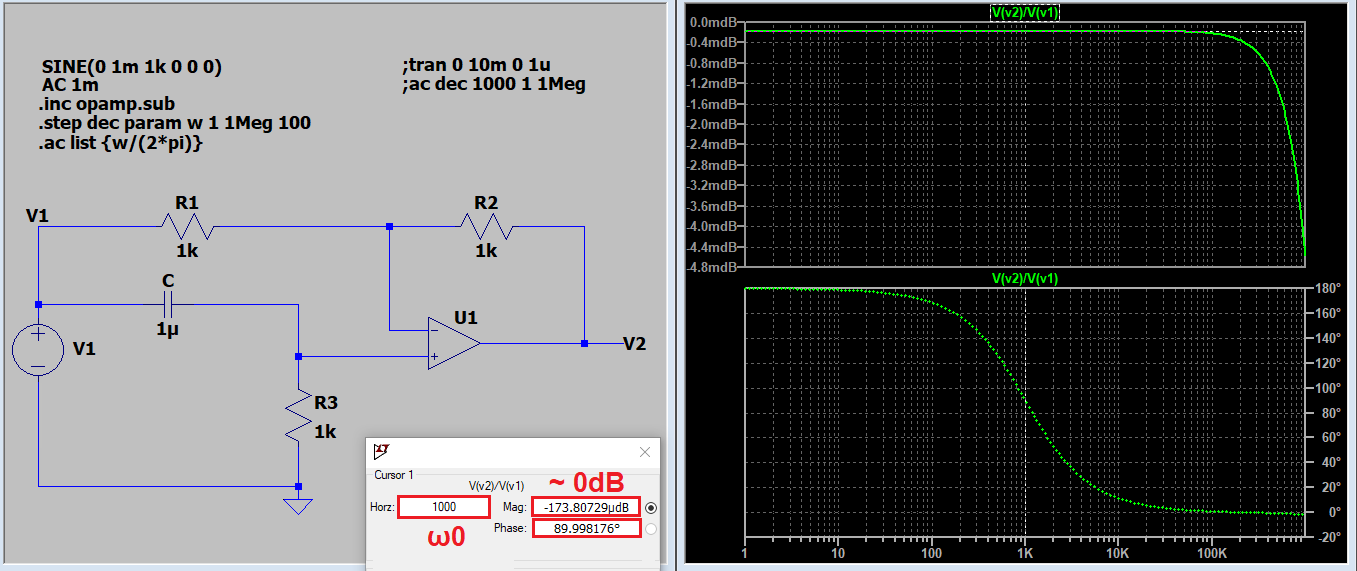

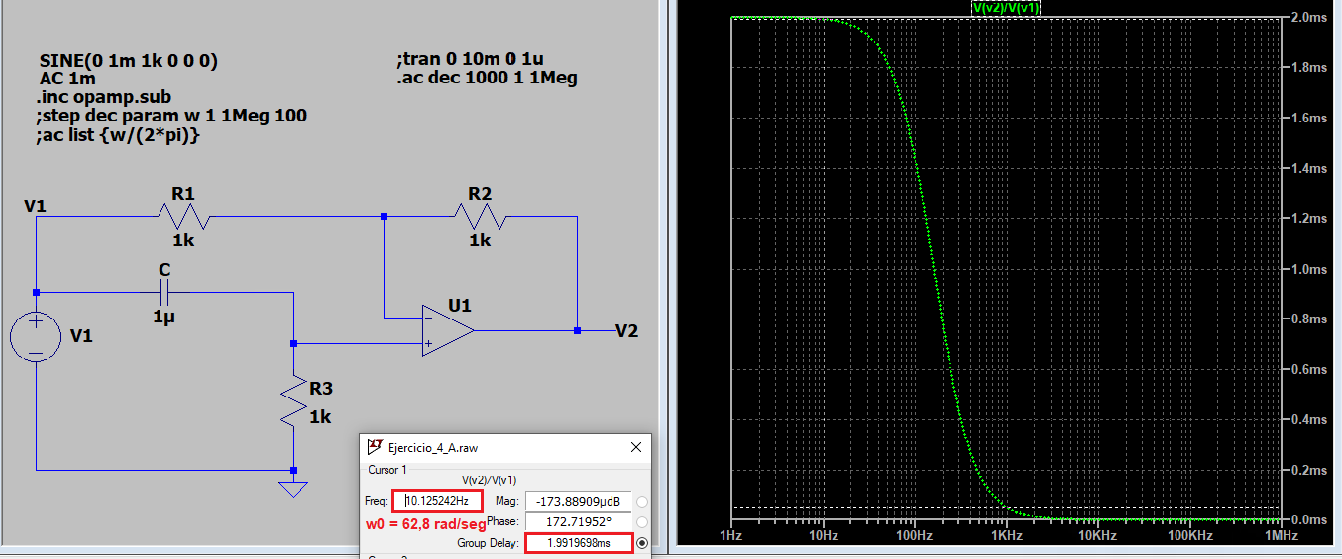

------------
### **5)**

### Este circuito llamado "pasa-todo" o "rotador de fase" puede servir para otorgar una demora (delay) a una señal (por ejemplo para ponerla en fase con otra, es decir sincronizarlas) en un sistema de comunicación, dado que se requiere un retardo de grupo constante para que no haya distorsión, en otras palabras misma demora en segundos a cada componente de frecuencia.
### Cabe aclarar que esto funciona solo sobre una banda de frecuencias de trabajo, fuera de ella los delays empiezan a variar como se puede ver en la simulación: a partir de $\,\omega\approx 62,8 \frac {rad}{seg}\,$ se empieza a ver una variación visualmente considerable donde el retardo de grupo deja de ser constante.